Members: Ambrose Blay (ab2838), Winifred Agyei(wa77)

Understanding salary determinants is crucial in today's job market. In this study, we analyze how "Gender," "Age," "Years of Experience," and "Education Level" influence salary levels. Leveraging machine learning algorithms, we aim to develop predictive models and assess feature importance. Our objectives include model evaluation, determining feature significance, and generating actionable insights for stakeholders. By uncovering the factors driving salary differentials,

Data source: https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer?resource=download

Import libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score

In [11]:
data = pd.read_csv("Salary Data.csv")  # read the data

data.head(5)  # head

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [12]:
data["gender_code"] = 0  # create dummy gender_code column
data["education_code"] = 0  # create dummy education_code column

Our data has some features that are non-numerical. We decide to perform encoding on these columns to convert them to numerical values suitable for our ML models

In [13]:
# Performing encoding on the Gender and Education Level columns.
for idx in range(0, len(data)):
    if data["Gender"][idx] == "Male":
        data["gender_code"][idx] = 1
        
    elif data["Gender"][idx] == "Female":
        data["gender_code"][idx] = 0
        
    if data["Education Level"][idx] == "PhD":
        data["education_code"][idx] = 2
    elif data["Education Level"][idx] == "Master's":
        data["education_code"][idx] = 1
    elif data["Education Level"][idx] == "Bachelor's":
        data["education_code"][idx] = 0

/var/folders/j1/pkbl1l_d4sqbfwdlc58wv1qh0000gn/T/ipykernel_16141/510510610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gender_code"][idx] = 1
/var/folders/j1/pkbl1l_d4sqbfwdlc58wv1qh0000gn/T/ipykernel_16141/510510610.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["education_code"][idx] = 0
/var/folders/j1/pkbl1l_d4sqbfwdlc58wv1qh0000gn/T/ipykernel_16141/510510610.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [14]:
data = data.dropna()  # drop the null values
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,gender_code,education_code
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,52.0,Male,Master's,Director,20.0,200000.0,1,1
...,...,...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0,0,0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0,1,1
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0,0,0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0,1,0


We dropped some empty cells to make our predictions more accurate

To determine which model would be perfect for project, we did some tests using LinearRegression and DecesionTreecRegressor. The model with the higher Test score will be the ideal model.

In [15]:
linear_model = LinearRegression()  # create linear regression model

In [16]:
X = data[["Age", "Years of Experience"]]
Y = data["Salary"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1998)

In [17]:


linear_model.fit(X_train, Y_train)

predictions = linear_model.predict(X_test)

print("Train Accuracy: ", linear_model.score(X_train, Y_train))
print("Test Accuracy: ", linear_model.score(X_test, Y_test))


Train Accuracy:  0.8476237892796669
Test Accuracy:  0.9081994571705907


In [18]:
tree_model = DecisionTreeRegressor(max_depth = 10)

In [19]:
tree_model.fit(X_train, Y_train)

print("Train Accuracy: ", tree_model.score(X_train, Y_train))
print("Test Accuracy: ", tree_model.score(X_test, Y_test))


Train Accuracy:  0.9386020271317328
Test Accuracy:  0.8536765441907064


Between the two models, the linear_model produces a higher Test Accuracy. It is therefore the better model. 

The next goal is to determine which of the features is the best predictor of a person's Salary using our Linear Regression model.

In [28]:
X_age = data[["Age"]]  # using age as the feature

X_age_train, X_age_test, Y_age_train, Y_age_test = train_test_split(X_age, Y, test_size=0.33, random_state=1998)

linear_model.fit(X_age_train, Y_age_train)

age_score = linear_model.score(X_age_test, Y_age_test)
print(age_score)


0.8830917225977292


In [27]:
X_yoe = data[["Years of Experience"]]  # using Years of Experience as the feature

X_yoe_train, X_yoe_test, Y_yoe_train, Y_yoe_test = train_test_split(X_yoe, Y, test_size=0.33, random_state=1998)

linear_model.fit(X_yoe_train, Y_yoe_train)

yoe_predictions = linear_model.predict(X_yoe_test)

yoe_score = linear_model.score(X_yoe_test, Y_yoe_test)
print(yoe_score)

0.9107637966171479


In [21]:
X_gender = data[["gender_code"]]  # using Gender as the feature

X_gender_train, X_gender_test, Y_gender_train, Y_gender_test = train_test_split(X_gender, Y, test_size=0.33, random_state=1998)

linear_model.fit(X_gender_train, Y_gender_train)

gender_score = linear_model.score(X_gender_test, Y_gender_test)
print(gender_score)

-0.008723061148893763


In [29]:
X_education = data[["education_code"]]  # using Education Level as the feature

X_education_train, X_education_test, Y_education_train, Y_education_test = train_test_split(X_education, Y, test_size=0.33, random_state=1998)

linear_model.fit(X_education_train, Y_education_train)

education_score = linear_model.score(X_education_test, Y_education_test)
print(education_score)

0.37237567094261903


We then visualized which of our features is the best predictor for a person's Salary.

Text(0, 0.5, 'Accuracy Score')

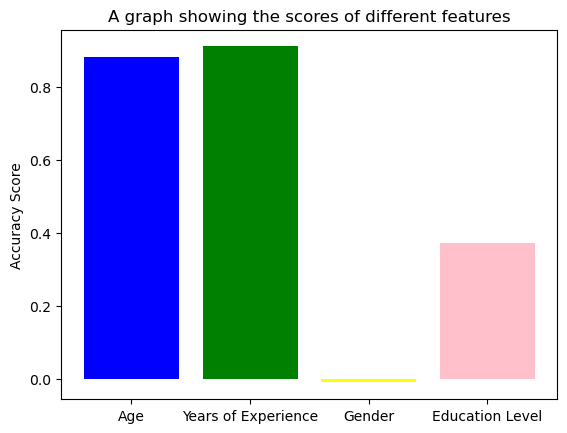

In [30]:
age_bar = age_score

yoe_bar = yoe_score

gender_bar = gender_score

education_bar = education_score

colors = ["blue", "green", "yellow", "pink"]
plt.bar([0,1,2,3],[age_bar, yoe_bar, gender_bar, education_bar], color = colors)
plt.xticks([0,1, 2, 3],['Age','Years of Experience', 'Gender', 'Education Level'])
plt.title("A graph showing the scores of different features")
plt.ylabel('Accuracy Score')

Gender has the lowest bearing on a person's Salary. It can be concluded that it has no influence on Salary.
The best predictor for Salary is Years of Experience

We then visualized how accurate our model is. 

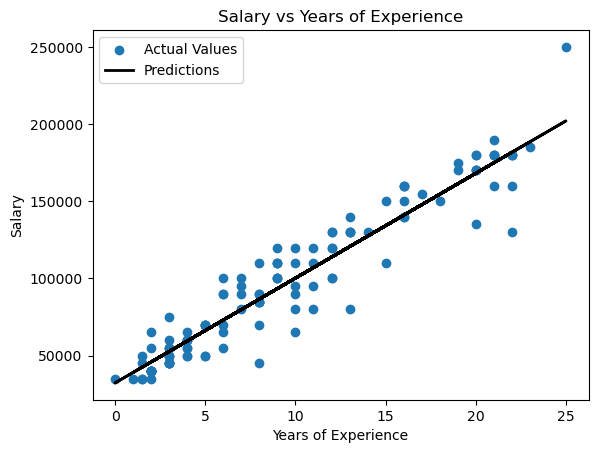

In [31]:
predictions = yoe_predictions

plt.scatter(X_yoe_test, Y_yoe_test)
plt.plot(X_yoe_test, predictions, 'k', linewidth=2)
plt.legend(["Actual Values","Predictions"])
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [37]:
data["Total Years of Experience"] = data["Age"] + data["Years of Experience"]

data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,gender_code,education_code,Total Years of Education,Total Years of Experience
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,5.0,37.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,4.0,31.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,17.0,60.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,7.0,43.0
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,21.0,72.0


In [40]:
X_ya = data[["Total Years of Experience"]]  # using Years of Experience plus education level as the feature

X_ya_train, X_ya_test, Y_ya_train, Y_ya_test = train_test_split(X_ya, Y, test_size=0.33, random_state=1998)

linear_model.fit(X_ya_train, Y_ya_train)

ya_predictions = linear_model.predict(X_ya_test)

ya_score = linear_model.score(X_ya_test, Y_ya_test)
print(ya_score)

0.904968506633559


Lastely we wanted to check if the sum of Education level and Age would give a higher prediction since they both had a higher prediction.

In [ ]:
After conducting our analysis, we've gathered insightful findings regarding the factors influencing salary levels in our dataset.
Here are the key takeaways:
    
    1. Gender Impact: Gender exhibits a negligible effect on salaries, as indicated by the negative correlation 
    coefficient obtained from our linear regression model. This implies that gender does not significantly influence salary levels.
    
    2.Years of Experience and Age Significance: Both "Years of Experience" and "Age" demonstrate a substantial impact
    on salary levels, with "Years of Experience" exhibiting the highest influence. This suggests that individuals with more
    years of experience tend to command higher salaries, highlighting the importance of professional tenure in determining earning potential.

    3.Total Years of Education Analysis: We hypothesized that combining "Years of Experience" with "Age" might yield a stronger predictor of salary 
    levels due to their individual significance. However, our analysis reveals that while the combined feature, "Total Years of Experience," still 
    exhibits a strong positive correlation with salary levels, its predictive power is slightly lower than that of "Years of Experience" alone